In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
descr = pd.read_csv('train_data_dict.csv')

In [4]:
descr

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [6]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [8]:

train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [9]:
test.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [10]:
# Stay is our target variable
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [11]:
train['Stay'] =  train['Stay'] .replace(('0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'),(0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9))

In [12]:
train['Stay'].unique()

array([ 0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9], dtype=int64)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [14]:
object_var = train.select_dtypes(include='object')
object_var.head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age
0,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60
1,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60
2,e,X,anesthesia,S,E,Trauma,Extreme,51-60
3,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60
4,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60


In [15]:
numerical_var = train.select_dtypes(include='number')
numerical_var.head()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay
0,1,8,3,3,2.0,31397,7.0,2,4911.0,0
1,2,2,5,2,2.0,31397,7.0,2,5954.0,4
2,3,10,1,2,2.0,31397,7.0,2,4745.0,3
3,4,26,2,2,2.0,31397,7.0,2,7272.0,4
4,5,26,2,2,2.0,31397,7.0,2,5558.0,4


In [16]:
# Treating missing value
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [17]:
train['Bed Grade'] = train['Bed Grade'].fillna(train['Bed Grade'].mode()[0])
test['Bed Grade'] = test['Bed Grade'].fillna(test['Bed Grade'].mode()[0])

In [18]:
train['City_Code_Patient'] = train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0])
test['City_Code_Patient'] = test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0])

In [20]:
train.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [21]:
#unique value in all column train
cols = train.columns
for col in cols:
    print(col,train[col].nunique())

case_id 318438
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 92017
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [22]:
train.drop(['case_id'], inplace=True, axis=1)
test.drop(['case_id'], inplace=True, axis=1)

In [23]:
train.drop(['patientid'], inplace=True, axis=1)
test.drop(['patientid'], inplace=True, axis=1)

In [24]:
# Treat categorical variable
object_var.head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age
0,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60
1,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60
2,e,X,anesthesia,S,E,Trauma,Extreme,51-60
3,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60
4,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Age'] = le.fit_transform(train['Age'])
test['Age'] = le.fit_transform(test['Age'])

In [26]:
# lets encode the education in their degree of importance 
train['Severity of Illness']= train['Severity of Illness'].replace(("Moderate", "Minor", "Extreme"),
                                                (3, 2, 1))
test['Severity of Illness']= test['Severity of Illness'].replace(("Moderate", "Minor", "Extreme"),
                                                (3, 2, 1))

In [27]:

train['Hospital_type_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [28]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Hospital_type_code'] = le.fit_transform(train['Hospital_type_code'])
test['Hospital_type_code'] = le.fit_transform(test['Hospital_type_code'])

In [30]:

train['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [31]:

train['Hospital_region_code'].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Hospital_region_code'] = le.fit_transform(train['Hospital_region_code'])
test['Hospital_region_code'] = le.fit_transform(test['Hospital_region_code'])

In [33]:
train['Hospital_region_code'].value_counts()

0    133336
1    122428
2     62674
Name: Hospital_region_code, dtype: int64

In [34]:
train['Ward_Type'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Ward_Type'] = le.fit_transform(train['Ward_Type'])
test['Ward_Type'] = le.fit_transform(test['Ward_Type'])

In [36]:
train['Ward_Type'].value_counts()

2    127947
1    106165
3     77794
0      5046
4      1477
5         9
Name: Ward_Type, dtype: int64

In [37]:
train['Ward_Facility_Code'].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Ward_Facility_Code'] = le.fit_transform(train['Ward_Facility_Code'])
test['Ward_Facility_Code'] = le.fit_transform(test['Ward_Facility_Code'])

In [39]:
train['Ward_Facility_Code'].value_counts()

5    112753
4     55351
3     51809
2     35463
1     35156
0     27906
Name: Ward_Facility_Code, dtype: int64

In [40]:
train['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [41]:
object_var = train.select_dtypes(include='object')
object_var.head()

,Department,Type of Admission
0,radiotherapy,Emergency
1,radiotherapy,Trauma
2,anesthesia,Trauma
3,radiotherapy,Trauma
4,radiotherapy,Trauma


In [42]:
#Dummy Variables:
train = pd.get_dummies(train, columns =['Department','Type of Admission'])
test = pd.get_dummies(test, columns =['Department','Type of Admission'])

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 22 columns):
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null int32
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null int32
Available Extra Rooms in Hospital    318438 non-null int64
Ward_Type                            318438 non-null int32
Ward_Facility_Code                   318438 non-null int32
Bed Grade                            318438 non-null float64
City_Code_Patient                    318438 non-null float64
Severity of Illness                  318438 non-null int64
Visitors with Patient                318438 non-null int64
Age                                  318438 non-null int32
Admission_Deposit                    318438 non-null float64
Stay                                 318438 non-null int64
Department_TB & Chest disease        318438 non-null uint

In [45]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
#correlation matrix
corr

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Severity of Illness,...,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
Hospital_code,1.000000,0.039449,0.128294,-0.135920,-0.059638,0.161108,-0.132347,-0.013374,-0.015477,-0.007585,...,0.045446,0.042846,0.008237,0.001301,-0.012784,0.011665,0.002433,0.011368,-0.002291,-0.012086
Hospital_type_code,0.039449,1.000000,-0.000839,0.268962,-0.103044,0.246347,-0.265768,0.018973,0.055272,-0.004625,...,0.025341,0.058592,0.007203,-0.034877,0.036172,-0.018592,-0.011191,-0.081201,0.046488,0.044452
City_Code_Hospital,0.128294,-0.000839,1.000000,0.008311,-0.045771,0.122285,-0.100474,-0.049400,-0.024161,-0.000018,...,-0.034455,0.006381,0.000624,-0.048549,0.028154,0.007897,0.002447,0.031003,-0.038472,0.011837
Hospital_region_code,-0.135920,0.268962,0.008311,1.000000,-0.006906,0.077769,-0.507350,-0.042262,0.150714,-0.006067,...,0.075092,0.011905,-0.009887,-0.062597,0.043601,0.007421,-0.003233,0.023780,-0.053683,0.042686
Available Extra Rooms in Hospital,-0.059638,-0.103044,-0.045771,-0.006906,1.000000,-0.433849,0.050453,-0.115913,-0.009462,0.015053,...,-0.143739,-0.121120,-0.027382,-0.103701,0.114315,-0.041458,-0.007076,0.036569,-0.047918,0.017491
Ward_Type,0.161108,0.246347,0.122285,0.077769,-0.433849,1.000000,-0.155031,-0.013366,0.015692,0.001503,...,0.050825,0.185191,0.015237,0.019241,-0.036764,0.022585,0.008138,-0.007325,-0.003362,0.014513
Ward_Facility_Code,-0.132347,-0.265768,-0.100474,-0.507350,0.050453,-0.155031,1.000000,0.075573,-0.139691,0.014844,...,-0.023057,-0.004552,0.010982,0.050194,-0.030310,-0.012735,-0.005572,-0.074604,0.084537,-0.017306
Bed Grade,-0.013374,0.018973,-0.049400,-0.042262,-0.115913,-0.013366,0.075573,1.000000,-0.007439,0.050104,...,0.073889,0.025692,0.023390,0.141780,-0.101149,-0.006754,-0.026190,-0.144964,0.106079,0.047263
City_Code_Patient,-0.015477,0.055272,-0.024161,0.150714,-0.009462,0.015692,-0.139691,-0.007439,1.000000,-0.007774,...,0.025485,-0.009447,-0.008800,-0.013689,0.004115,0.012658,0.002813,0.042892,-0.045762,0.006000
Severity of Illness,-0.007585,-0.004625,-0.000018,-0.006067,0.015053,0.001503,0.014844,0.050104,-0.007774,1.000000,...,0.023993,-0.031188,0.000888,0.007553,-0.003004,-0.000646,-0.015086,-0.011751,0.006789,0.006346


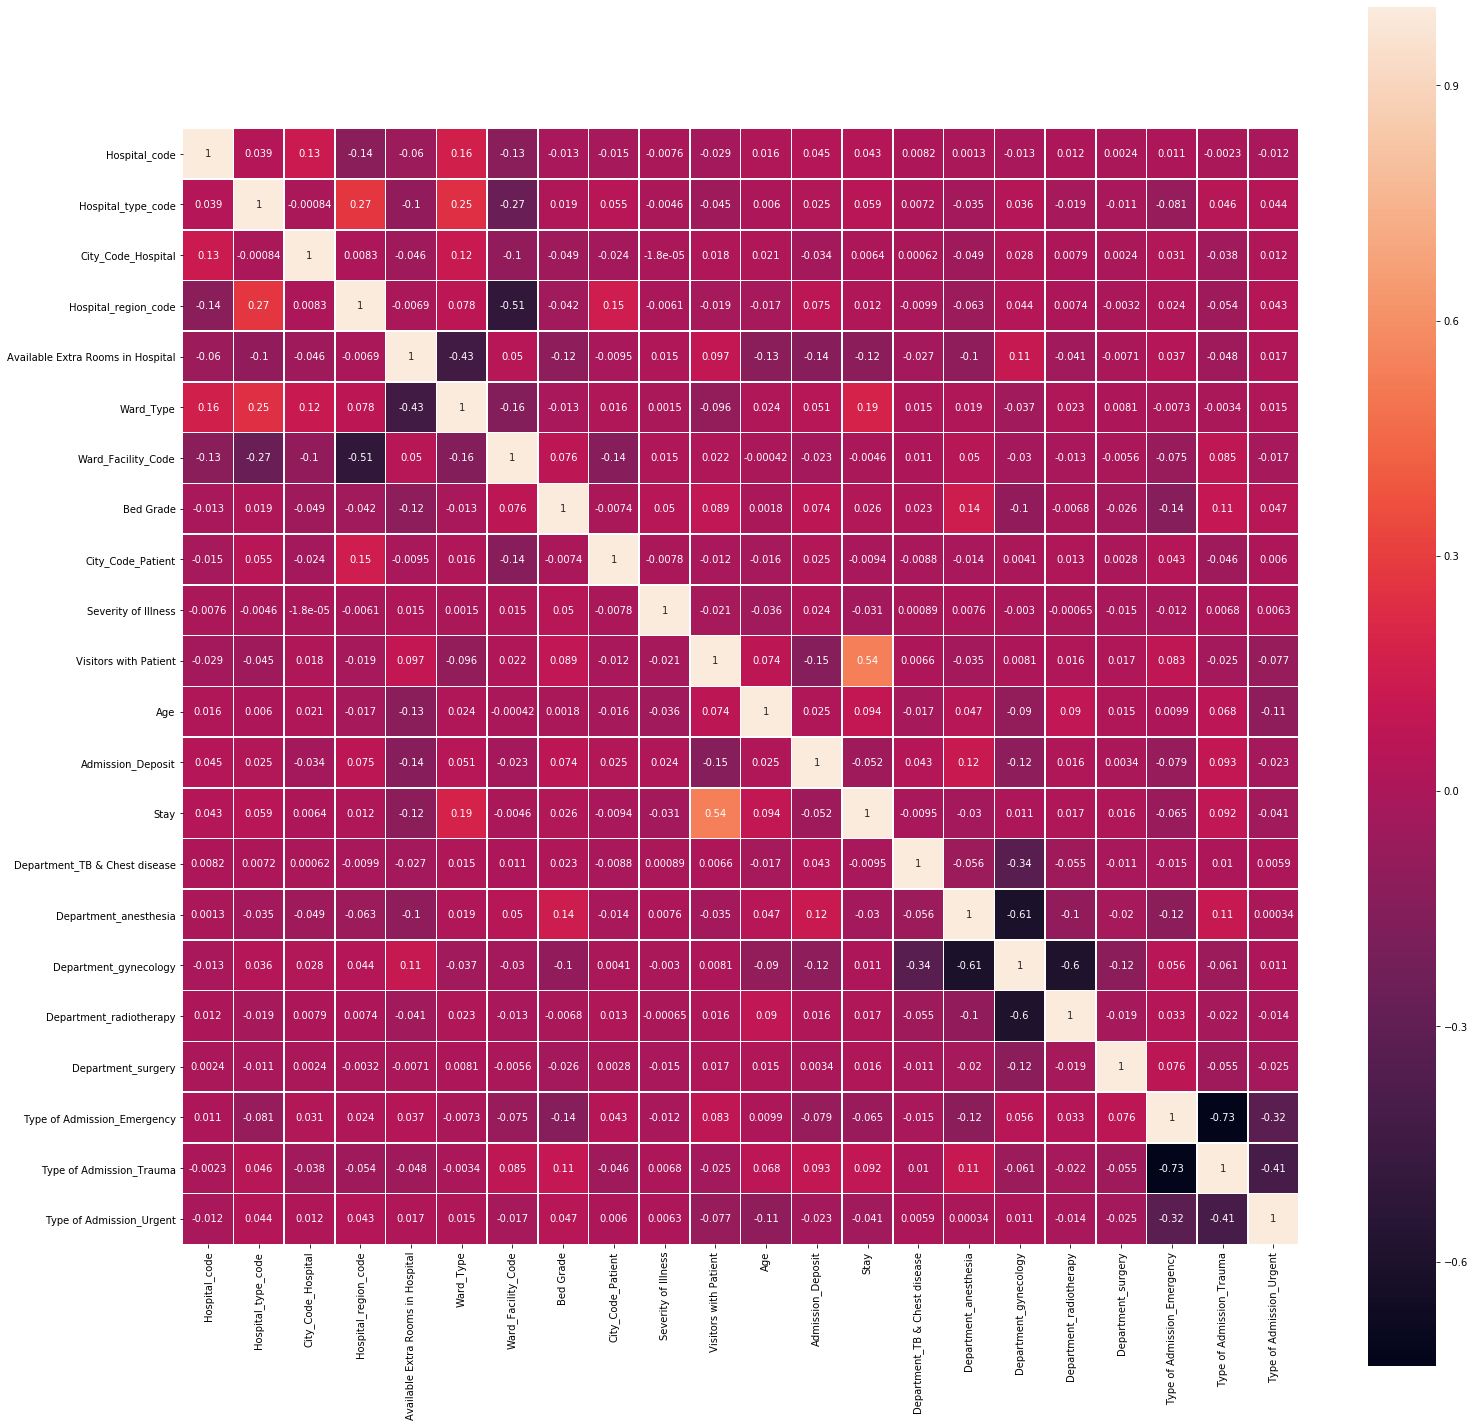

In [46]:
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(corr,square=True,ax=ax,annot=True,linewidths=.5);

In [47]:
#Export files as modified versions:
train.to_csv("train_cleaned.csv",index=False)
test.to_csv("test_cleaned.csv",index=False)

In [48]:
# Build Model
train_df = pd.read_csv('train_cleaned.csv')
test_df = pd.read_csv('test_cleaned.csv')

In [49]:
# lets split the target data from the train data

y = train_df['Stay']
X = train_df.drop(['Stay'], axis = 1)
x_test = test_df

# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)
print("Shape of the test data :", x_test.shape)

Shape of the x : (318438, 21)
Shape of the y : (318438,)
Shape of the test data : (137057, 21)


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)
X

array([[-1.19517603,  0.48391882, -0.57105545, ...,  1.30616129,
        -0.95721365, -0.42388118],
       [-1.89012389,  0.48391882,  0.07357963, ..., -0.76560223,
         1.04469885, -0.42388118],
       [-0.96352675,  1.78624835, -1.21569054, ..., -0.76560223,
         1.04469885, -0.42388118],
       ...,
       [-1.31100068, -0.81841071, -0.24873791, ...,  1.30616129,
        -0.95721365, -0.42388118],
       [-0.84770211, -0.16724594, -0.89337299, ..., -0.76560223,
         1.04469885, -0.42388118],
       [ 0.07889503, -0.81841071,  0.71821472, ...,  1.30616129,
        -0.95721365, -0.42388118]])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [53]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the test data :", x_test.shape)

Shape of the X Train : (191062, 21)
Shape of the y Train : (191062,)
Shape of the X test : (127376, 21)
Shape of the y test : (127376,)
Shape of the test data : (137057, 21)


In [54]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X,y)

y_pred = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))



cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.45717620458280556
Testing Accuracy : 0.4587363396558221
              precision    recall  f1-score   support

           0       0.46      0.20      0.28      9443
           1       0.46      0.53      0.49     31236
           2       0.44      0.69      0.54     35178
           3       0.47      0.26      0.33     21974
           4       0.77      0.02      0.04      4666
           5       0.45      0.55      0.50     14039
           6       0.98      0.04      0.09      1098
           7       0.71      0.08      0.14      4072
           8       0.58      0.35      0.43      1934
           9       0.87      0.10      0.18      1084
          10       0.66      0.50      0.57      2652

    accuracy                           0.46    127376
   macro avg       0.62      0.30      0.33    127376
weighted avg       0.49      0.46      0.43    127376



In [57]:
df = pd.DataFrame(np.c_[y_test,y_pred], columns = ["actualpredict","machinepredict"])
df

,actualpredict,machinepredict
0,5,1
1,5,5
2,2,2
3,2,1
4,3,2
...,...,...
127371,7,5
127372,2,2
127373,2,2
127374,3,3


In [58]:
# Test data

from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
x_test =  sc_test.fit_transform(x_test)
x_test

array([[ 0.30762666,  0.4877631 , -0.56691147, ...,  1.30536861,
        -0.9554972 , -0.42488648],
       [ 1.2341249 , -0.82291912, -0.24456305, ..., -0.76606714,
         1.04657554, -0.42488648],
       [ 0.88668806, -0.16757801, -0.88925989, ...,  1.30536861,
        -0.9554972 , -0.42488648],
       ...,
       [ 1.34993718,  0.4877631 , -0.56691147, ..., -0.76606714,
        -0.9554972 ,  2.35356984],
       [-1.54536983, -0.82291912, -1.21160831, ..., -0.76606714,
         1.04657554, -0.42488648],
       [-1.42955755, -0.82291912,  0.40013379, ..., -0.76606714,
         1.04657554, -0.42488648]])

In [59]:
y_pred_test = xgb.predict(x_test)
y_pred_test

array([0, 5, 2, ..., 1, 1, 3], dtype=int64)

In [61]:
# Submission file

sub = pd.read_csv('sample_submission_lfbv3c3.csv')

In [62]:
sub

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [63]:
sub['Stay'] = y_pred_test
sub

,case_id,Stay
0,318439,0
1,318440,5
2,318441,2
3,318442,2
4,318443,5
...,...,...
137052,455491,2
137053,455492,0
137054,455493,1
137055,455494,1


In [64]:

sub['Stay'] = sub['Stay'].replace((0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9),
                                  ('0-10', '41-50', '31-40', '11-20', '51-60', 
                        '21-30', '71-80','More than 100 Days', '81-90', '61-70', '91-100'))

In [65]:
sub

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,21-30
137053,455492,0-10
137054,455493,11-20
137055,455494,11-20


In [67]:
sub.to_csv("xgbsolution_final.csv", index=False)